# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a data story product with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 



**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have 
seen throughout the course.**

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a **poster format** or **few slides** to tell your story (with a unique angle) from the conclusions you derive for the audience you have decided. 



Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in THIS exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, Adobe, etc.) by **pasting your visualizations and creating all necessary elements** (captions, text annotations, layout, etc.) 

4. Save your end product as a **PDF FILE** and upload it to your exercises folder (**MAKE SURE TO NAME IT L8_Exercise.pdf**)

You should start with a clear message or angle in your mind for your audience, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)** in a nice layout. Make sure to have a **clean layout** they can follow, and **enough text annotations and captions** to make your message/point clear. 


Look at the **good and bad examples** in the lab notebook and consult the links. 

You can choose any type of visualization that you believe will be most **effective** for the type of data, characteristics of the data, visual tasks, and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use every principle you have learned in this course.** 

---

Following is to show how to save a plot to a file: 

In [359]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

## Initial Data Ingestion and Cleaning

Looking into COVID cases during 2020 and the beginining of 2021. 

- [Data found here](https://www.kaggle.com/datasets/cristiangarrido/covid19geographicdistributionworldwide)
- [GDP Data Found Here](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths)

#### I set out to find some of the following information 

Start with a question to ask. Why did the united states with the hightest GDP and most wealth have the most COVID CAses and Deaths in the entire world during 2020 and the start of 2021? 

- Total Covid Cases by country displayed on a map using a gradient color scheme to distinguish between few or many cases. 
    - Did this 
- COVID cases per month of the data displayed on a map, but faceted by month to see what areas of the world were hot at different time periods. 
- Scatter plot of COVID deaths vs. Country GDP. 
    - Grouping by continent
- Line graph showing case counts for various countries or continents over time. 
    - Were certain areas of the world affected at different times throughout the pandemic. 
- Scatter plot of total cases vs. population of countries. 
- Would be interesting to look into some sort of correlation between temperature and covid cases or deaths. 
    - Need to think about this one more. 

In [74]:
# Read your data here; 

# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere

# <- ALL YOUR CODE BELOW THIS POINT ->



In [93]:
library(ggplot2)
library(dplyr)
library(stringr)
library(lubridate)
library(reshape2)
library(ggrepel)
library(scales)
library(grid)
library(RColorBrewer)

In [94]:
# Read in the data I want to look at
countries <- read.csv("Countries_ISO.csv",  header=TRUE)
covid <- read.csv("COVID-19-geographic-disbtribution-worldwide.csv",  header=TRUE)
beds <- read.csv("Hospital_beds_by_country.csv",  header=TRUE)
gdp <- read.csv("gdp-csv-.csv", header=TRUE)
total_pop <- read.csv("Total_population_by_Country_ISO3_Year_2018.csv", header=TRUE)
pop_density <- read.csv("world_pop_density.csv", header=TRUE)

# Just pull the data that we want to look at and get rid of columns that are not meaningful to us. 
countries <- countries %>% select(c('Country', 'Alpha.3.code', 'Numeric'))
covid <- covid %>% select(-c('source'))
beds <- beds %>% select(c('LOCATION', 'TIME', 'Value'))
total_pop <- total_pop %>% select(c('Country.Name', 'Country.Code', 'X2018'))

# Displaying the first rows of each data frame
# head(countries)
# head(covid)
# head(beds)
# head(gdp)
# head(total_pop)
head(pop_density)

# Seeing what the dimensions of each data frame are. 
cat('covid dim',dim(covid), '\n')
cat('countries dim',dim(countries), '\n')
cat('beds dim',dim(beds), '\n')

# Looks like there is only 44 rows in the hospital beds set. Good to know as we will not be able to use that data for
# every country. The value is number of beds per 1000 people in that country. 

Series.Name,Series.Code,Country.Name,Country.Code,X2017..YR2017.,X2018..YR2018.,X2019..YR2019.,X2020..YR2020.
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Population density (people per sq. km of land area),EN.POP.DNST,Afghanistan,AFG,55.649251031078,56.9920457507321,58.3256780583536,59.6849899575303
Population density (people per sq. km of land area),EN.POP.DNST,Albania,ALB,104.870693430657,104.612262773723,104.167554744526,103.571131386861
Population density (people per sq. km of land area),EN.POP.DNST,Algeria,DZA,17.3776972391205,17.7300617489475,18.0762954494212,18.4113398560129
Population density (people per sq. km of land area),EN.POP.DNST,American Samoa,ASM,278.085,277.305,276.56,275.985
Population density (people per sq. km of land area),EN.POP.DNST,Andorra,AND,163.823404255319,163.846808510638,164.140425531915,164.393617021277
Population density (people per sq. km of land area),EN.POP.DNST,Angola,AGO,23.9165549049491,24.7130721103714,25.527632148873,26.3626116948745


covid dim 20652 9 
countries dim 249 3 
beds dim 44 3 


In [95]:
# As I started making maps to show some of the data, I realized that naming conventions between the COVID data and
# Map data was off. 
covid <- covid %>% mutate(country = recode(country, 'United States'='USA'))


In [96]:
# Understanding the time span of this data. 
unique(covid$year_week)
# May want to look at months rather than weeks. Will need to split this and do some data manipulation. 

covid[,c('year', 'week')] <- str_split_fixed(covid$year_week, '-', 2)
covid$week_num <- covid$week
covid <- covid %>% mutate(week = recode(week, '01'='January', '02'='January', '03'='January', '04'='January', 
    '05'='January', '06'='February', '07'='February', '08'='February', '09'='February', '10'='March', '11'='March',
    '12'='March', '13'='March', '14'='April', '15'='April', '16'='April', '17'='April', '18'='April', '19'='May',
    '20'='May', '21'='May', '22'='May', '23'='June', '24'='June', '25'='June', '26'='June', '27'='July', '28'='July',
    '29'='July', '30'='July', '31'='July', '32'='August', '33'='August', '34'='August', '35'='August', '36'='September',
    '37'='September', '38'='September', '39'='September', '40'='September', '41'='October', '42'='October',
    '43'='October', '44'='October', '45'='November', '46'='November', '47'='November', '48'='November',
    '49'='December', '50'='December', '51'='December', '52'='December', '53'='December'))

# Would like to look and see if there is a better more efficient way of doing this. 
# Remaname some columns
covid <- covid %>% rename('month'='week', 'week'='week_num') %>% select(-c('year_week'))
# Need to get into ordered levels
month_levels=c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
covid$month <- factor(covid$month, levels=month_levels)

t_pops <- filter(covid, grepl("total", country, fixed = TRUE)) %>% filter(week=="10" & indicator=='cases')


# Need to get gdp values into integers. These numbers are in millions of US Dollars. 
gdp$GDP <- as.character(gdp$GDP) #factor to character
gdp$GDP <- str_replace_all(gdp$GDP, ',', '') #remove the commas
gdp$GDP <- as.integer(gdp$GDP) #convert to integer


[1] 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09
[10] 2020-10 2020-11 2020-12 2020-13 2020-14 2020-15 2020-16 2020-17 2020-18
[19] 2020-19 2020-20 2020-21 2020-22 2020-23 2020-24 2020-25 2020-26 2020-27
[28] 2020-28 2020-29 2020-30 2020-31 2020-32 2020-33 2020-34 2020-35 2020-36
[37] 2020-37 2020-38 2020-39 2020-40 2020-41 2020-42 2020-43 2020-44 2020-45
[46] 2020-46 2020-47 2020-48 2020-49 2020-50 2020-51 2020-52 2020-53 2021-01
[55] 2021-02
55 Levels: 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 ... 2021-02

In [97]:
head(t_pops, 20)

country,country_code,continent,population,indicator,weekly_count,rate_14_day,cumulative_count,year,month,week
<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<dbl>,<int>,<chr>,<fct>,<chr>
Africa (total),,Africa,1339423921,cases,69,0.005524763,75,2020,March,10
America (total),,America,1021703563,cases,583,0.065772502,720,2020,March,10
Asia (total),,Asia,4498460442,cases,10112,0.393467948,96102,2020,March,10
EU/EEA (total),,Europe,452548145,cases,10270,2.719489658,12470,2020,March,10
Europe (total),,Europe,848075955,cases,11008,1.547384986,13299,2020,March,10
Oceania (total),,Oceania,42137809,cases,55,0.149509435,85,2020,March,10


##### Note:
Population Density is reported in people per sq. km of land area

percent.agglom is reported in Population in urban agglomerations of more than 1 million (% of total population)

In [98]:
# Need to rework the population density df a bit and get it with some of the covid data. 


pop_density <- pop_density %>%
    select(c('Series.Name', 'Country.Name', 'Country.Code', 'X2020..YR2020.')) %>% #pulling columns of interest
    rename('value_2020'='X2020..YR2020.') %>% #changing column name
    #Changing text in rows to be more concice to be melted to variables
    mutate(Series.Name = recode(Series.Name, 'Population density (people per sq. km of land area)'='population.density')) %>%
    mutate(Series.Name = recode(Series.Name, 'Population in urban agglomerations of more than 1 million (% of total population)'='percent.agglom')) %>%
    dcast(Country.Name + Country.Code ~ Series.Name, value.var='value_2020')

head(pop_density)


Country.Name,Country.Code,population.density,percent.agglom
<fct>,<fct>,<chr>,<chr>
Afghanistan,AFG,59.6849899575303,10.8443665760121
Africa Eastern and Southern,AFE,45.6205916725422,14.761201882829
Africa Western and Central,AFW,50.720206664483,17.5556536037729
Albania,ALB,103.571131386861,..
Algeria,DZA,18.4113398560129,6.31150552108875
American Samoa,ASM,275.985,..


In [99]:
# replacing all '..' with NA's
pop_density <- na_if(pop_density, '..')

# convert pop.density and percent.agg to numerical columns
pop_density$population.density <- as.numeric(pop_density$population.density)
pop_density$percent.agglom <- as.numeric(pop_density$percent.agglom)

In [100]:
head(pop_density)

Country.Name,Country.Code,population.density,percent.agglom
<fct>,<fct>,<dbl>,<dbl>
Afghanistan,AFG,59.68499,10.844367
Africa Eastern and Southern,AFE,45.62059,14.761202
Africa Western and Central,AFW,50.72021,17.555654
Albania,ALB,103.57113,NA
Algeria,DZA,18.41134,6.311506
American Samoa,ASM,275.98500,NA


In [101]:
# Get total covid cases by country. Merge with GDP data in order to get some data to play with exploring with GDP
# and how it relates to covid cases or deaths
total_case_per_code <- covid %>% 
    filter(indicator=='cases') %>%
    group_by(country_code, indicator) %>% 
    summarise(sum(weekly_count)) %>%
    rename('cases'='sum(weekly_count)')
total_death_per_code <- covid %>% 
    filter(indicator=='deaths') %>% 
    group_by(country_code, indicator) %>% 
    summarise(sum(weekly_count)) %>%
    rename('deaths'='sum(weekly_count)')
# head(total_death_per_code)

# Putting some of the data frames together to have total cases and deaths on one data frame with other 
# pertainant contry information. 
# head(total_pop)
total_case_death <- inner_join(total_case_per_code, gdp, by = c("country_code" = "Code"))
total_case_death <- inner_join(total_case_death, total_pop, by = c('country_code' = 'Country.Code'))
total_case_death <- inner_join(total_case_death, pop_density, by = c('country_code'='Country.Code'))
total_case_death <- inner_join(total_case_death, total_death_per_code, by =c("country_code" = "country_code"))
total_case_death <- total_case_death %>%
    select(c('country_code', 'Country', 'cases', 'deaths', 'GDP', 'X2018', 'population.density', 'percent.agglom')) %>%
    rename('population'='X2018')
total_case_death$death.rate <- total_case_death$deaths/total_case_death$cases*100 #calculating death rate of covid in each country
total_case_death$case_per_10k <- total_case_death$cases/(total_case_death$population/10000) #calculating cases per 10k people
total_case_death$gdp_percent <- total_case_death$GDP/max(total_case_death$GDP) # calculating GDP as a percentage of US as top
total_case_death$gdp_rank <- NA #Ranking GDP's
total_case_death$gdp_rank[order(-total_case_death$gdp_percent)] <- 1:nrow(total_case_death) #Ranking GDP's
total_case_death$rank_percent <- total_case_death$gdp_rank/nrow(total_case_death) #Converting rank to a percentage


# Making Categories for GDP to turn this variable into a categorical one to better compare GDP's in visualizations
breaks=c(0, .05, .1, .2, .4, 1)
labels= c('95th Percentile', '90th Percentile', '80th Percentile', '60th Percentile', 'Rest of the World')
total_case_death$gdp_group <- cut(total_case_death$rank_percent, breaks=breaks, labels=labels)


head(total_case_death)
# Had two tables, but decided just to merge total cases and total deaths into one df to make things easier. 

# total_case_death <- inner_join(total_death_per_code, gdp, by = c("country_code" = "Code"))
# total_case_death <- inner_join(total_case_death, total_pop, by = c('country_code' = 'Country.Code'))
# total_case_death <- inner_join(total_case_death, pop_density, by = c('country_code'= 'Country.Code'))
# total_case_death <- total_case_death %>%
#     select(c('country_code', 'Country', 'deaths', 'GDP', 'X2018', 'population.density', 'percent.agglom')) %>%
#     rename('population'='X2018')
# head(total_case_death)

Warning message:
“Column `country_code`/`Code` joining factors with different levels, coercing to character vector”Warning message:
“Column `country_code`/`Country.Code` joining character vector and factor, coercing into character vector”Warning message:
“Column `country_code`/`Country.Code` joining character vector and factor, coercing into character vector”Warning message:
“Column `country_code` joining character vector and factor, coercing into character vector”

country_code,Country,cases,deaths,GDP,population,population.density,percent.agglom,death.rate,case_per_10k,gdp_percent,gdp_rank,rank_percent,gdp_group
<chr>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
ABW,Aruba,6435,52,2701,105845,593.14444,NA,0.8080808,607.964476,0.0001386166,167,0.8743455,Rest of the World
AFG,Afghanistan,54141,2346,19544,37172386,59.68499,10.84437,4.3331302,14.564844,0.0010030077,111,0.5811518,Rest of the World
AGO,Angola,18875,436,122124,30809762,26.36261,25.34452,2.3099338,6.126305,0.0062674637,56,0.2931937,60th Percentile
ALB,Albania,67690,1277,13039,2866376,103.57113,NA,1.8865416,236.151852,0.0006691679,123,0.6439791,Rest of the World
AND,Andorra,9083,91,3013,77006,164.39362,NA,1.0018716,1179.518479,0.0001546286,162,0.8481675,Rest of the World
ARE,United Arab Emirates,253261,745,382575,9630959,139.26218,61.12805,0.2941629,262.965505,0.0196339371,29,0.1518325,80th Percentile


In [102]:
# Cases and deaths per year and month per country
covid_grouped <- covid %>% group_by(continent,year,  month, indicator) %>% summarise(sum(weekly_count))
head(covid_grouped)
# Decided not to use this because it was not helping show what I wanted to show. 

continent,year,month,indicator,sum(weekly_count)
<fct>,<chr>,<fct>,<fct>,<int>
Africa,2020,January,cases,0
Africa,2020,January,deaths,0
Africa,2020,February,cases,12
Africa,2020,February,deaths,0
Africa,2020,March,cases,9246
Africa,2020,March,deaths,286


In [103]:
# Getting total number of cases and deaths per country

# Did this above, but don't want to futz with it now. It is fine for showing the total cases and deaths on the world map. 
total_cases_per_country <- covid %>% 
    filter(indicator=='cases') %>% 
    group_by(country, indicator) %>% 
    summarise(sum(weekly_count)) %>%
    rename('cases'='sum(weekly_count)')
total_deaths_per_country <- covid %>% 
    filter(indicator=='deaths') %>% 
    group_by(country, indicator) %>% 
    summarise(sum(weekly_count)) %>%
    rename('deaths'='sum(weekly_count)')

# Lets find out the total number of cases and deaths per country per month in 2020. 
total_month_country_cases <- covid %>%
    filter(indicator=='cases', year=='2020') %>% 
    group_by(country, indicator, month) %>%
    summarise(sum(weekly_count)) %>%
    rename('cases'='sum(weekly_count)')
total_month_country_deaths <- covid %>% 
    filter(indicator=='deaths', year=='2020') %>% 
    group_by(country, indicator, month) %>% 
    summarise(sum(weekly_count)) %>%
    rename('deaths'='sum(weekly_count)')



In [104]:
# Generate a theme for my visualizations. 

my_theme <- function() {
         
    palette <- brewer.pal("Greys", n=9)
    color.background = palette[1] # background plot color
    color.grid.major = palette[4] 
    color.grid.minor = palette[2]
    color.axis.text = palette[7] # text color 
    color.axis.title = palette[8]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a white color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.3)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="right") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(family= 'Times New Roman', color=color.title, size=20, vjust=1.25, hjust=0.5)) +
    theme(axis.text.x=element_text(family= 'Times New Roman',size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(family= 'Times New Roman',size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(family= 'Times New Roman',size=12,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(family= 'Times New Roman',size=12,color=color.axis.title, vjust=1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

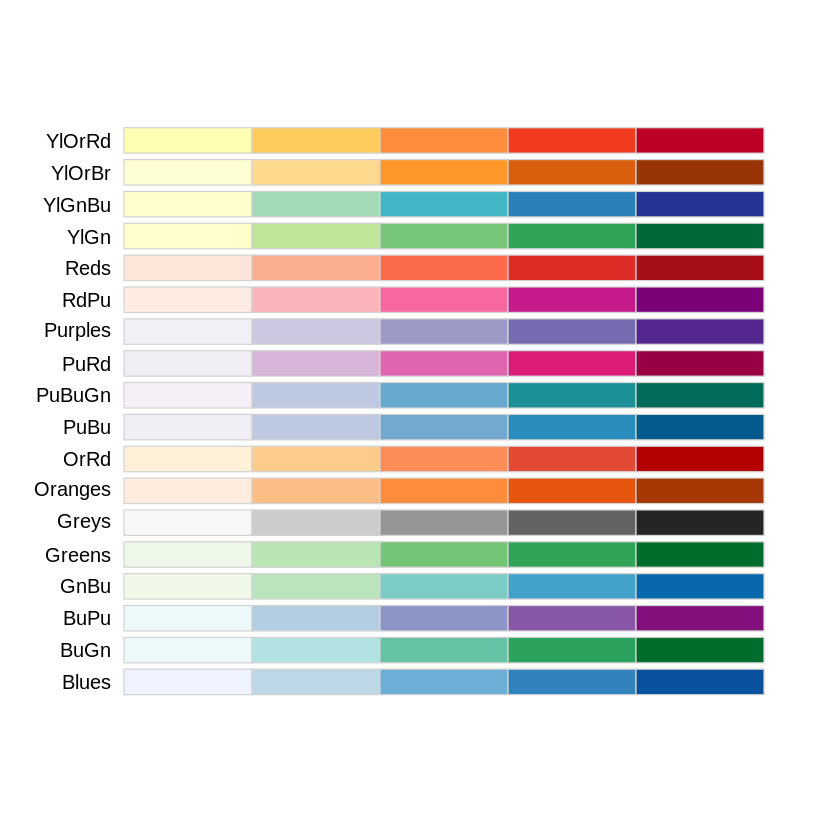

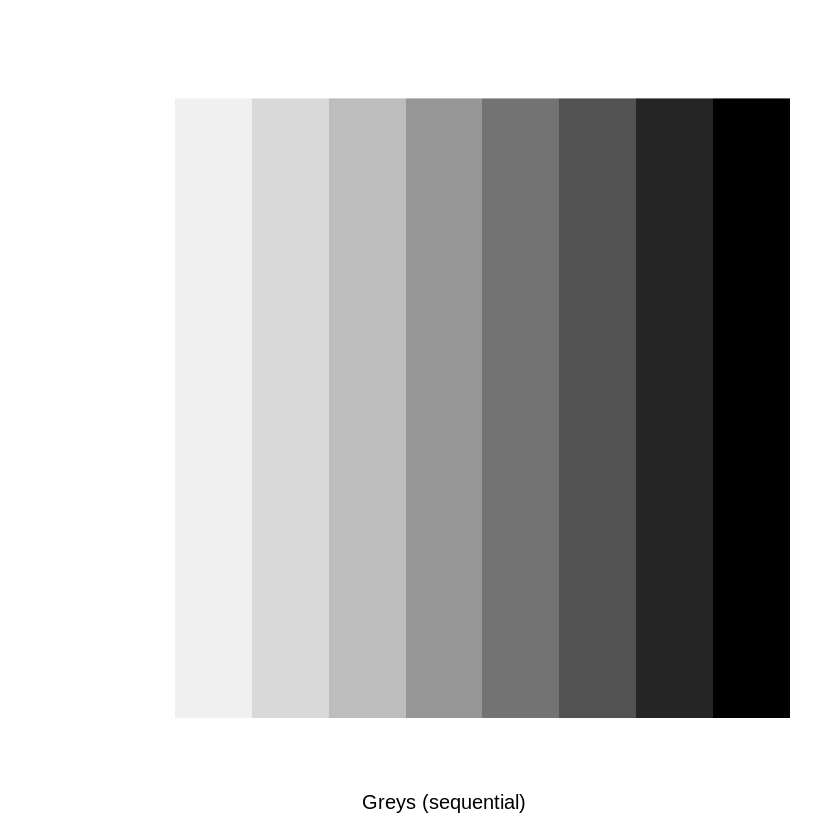

In [105]:
# Looking for a sequential pallete. 
display.brewer.all(n = 5, type = 'seq', colorblindFriendly = TRUE)

display.brewer.pal(9, 'Greys')

In [79]:
# Centering plot title on graphs. 
theme_update(plot.title = element_text(hjust = 0.5))

### Starting Some Basic Visualizations

In [80]:
# Pull in our world map Data
world <- map_data("world")


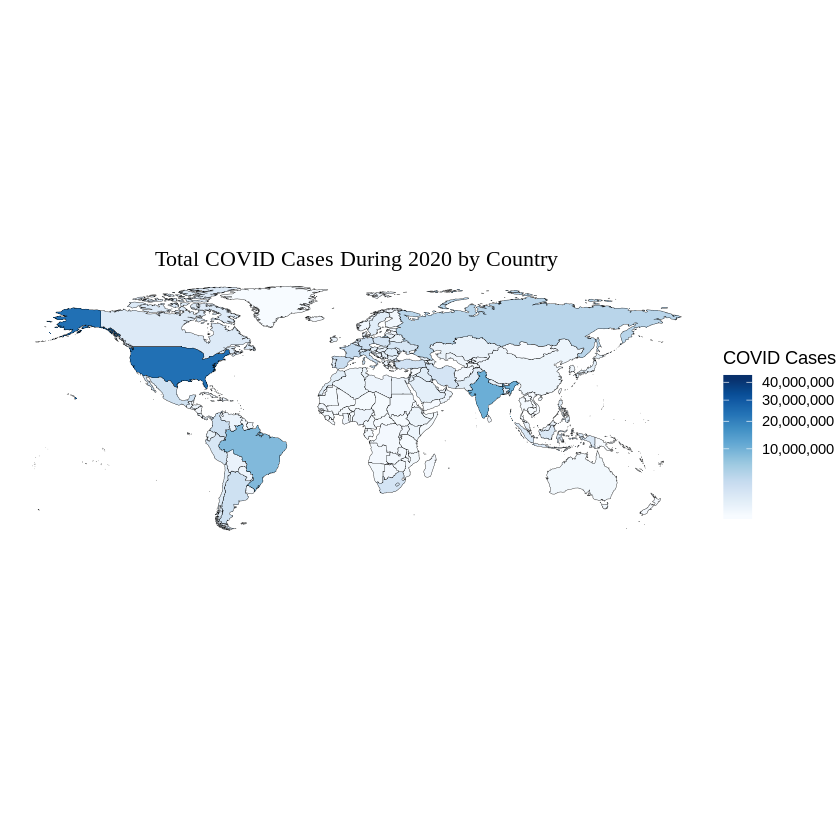

In [81]:
# png(filename="world_covid.png")
w <- ggplot(data=total_cases_per_country)
w <- w + geom_map(map=world, aes(map_id=country,fill = cases), color="black", size=0.1) +
    coord_equal() + expand_limits(x=world$long, y=world$lat) + 
    scale_fill_gradientn(colors=brewer.pal(9,"Blues"), trans='sqrt', labels = comma, name='COVID Cases') +
    labs(title="Total COVID Cases During 2020 by Country")+
    theme_void() +
    theme(plot.title=element_text(family='Times New Roman',hjust=0.5))
w
# dev.off()


In [82]:
# Plot Showing total deaths. Not going to use this one. 



w <- ggplot(data=total_deaths_per_country)
w <- w + geom_map(map=world, aes(map_id=country,fill = deaths), color="black", size=0.1) +
    coord_equal() + expand_limits(x=world$long, y=world$lat) + 
    scale_fill_gradientn(colors=brewer.pal(9,"Blues"), trans='sqrt', labels=comma, ) +
    theme_void()
# w


In [83]:
# Neat plot, but it is quite busy and probably not the best to show what I want. 

w <- ggplot(data=total_month_country_cases)
w <- w + geom_map(map=world, aes(map_id=country,fill = cases), color="black", size=0.1) +
    coord_equal() +  facet_wrap(~month, ncol=3) + expand_limits(x=world$long, y=world$lat) + 
    scale_fill_continuous(low='thistle2', high='darkblue', trans="log") +
    theme_void()
# w

In [84]:
# reminder of headings. 
head(total_case_death)

country_code,Country,cases,deaths,GDP,population,population.density,percent.agglom,death.rate,case_per_10k,gdp_percent,gdp_rank,rank_percent,gdp_group
<chr>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
ABW,Aruba,6435,52,2701,105845,593.14444,NA,0.8080808,607.964476,0.0001386166,167,0.8743455,Rest of the World
AFG,Afghanistan,54141,2346,19544,37172386,59.68499,10.84437,4.3331302,14.564844,0.0010030077,111,0.5811518,Rest of the World
AGO,Angola,18875,436,122124,30809762,26.36261,25.34452,2.3099338,6.126305,0.0062674637,56,0.2931937,60th Percentile
ALB,Albania,67690,1277,13039,2866376,103.57113,NA,1.8865416,236.151852,0.0006691679,123,0.6439791,Rest of the World
AND,Andorra,9083,91,3013,77006,164.39362,NA,1.0018716,1179.518479,0.0001546286,162,0.8481675,Rest of the World
ARE,United Arab Emirates,253261,745,382575,9630959,139.26218,61.12805,0.2941629,262.965505,0.0196339371,29,0.1518325,80th Percentile


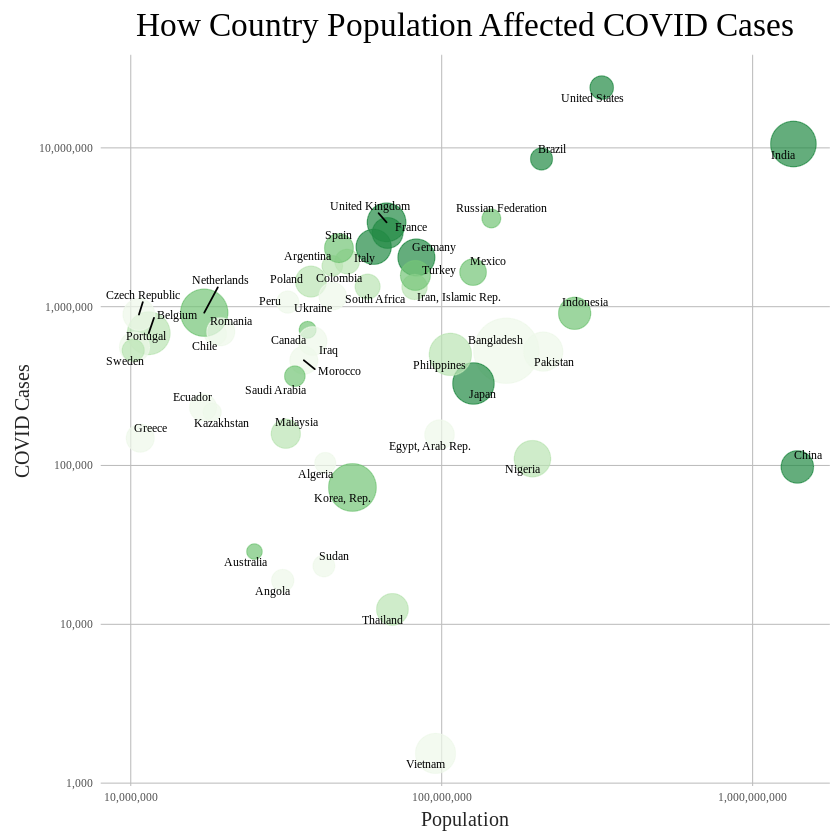

In [85]:
# Lets look at cases and death compared to population. See how that looks. Also need add in GDP as size of bubbles? 

# Looking only at contries with larger GDP's and with a population of over 100,000,000. This will be more comparable to the US
g2 <- ggplot(filter(total_case_death, GDP>100000 & population>10000000), aes(x=population, y=cases))#base plot #setting limits for size
 #scaling the color based GDP
# png(filename="covid_pop.png")

g2 +  geom_point(aes(color=gdp_group, size=population.density), alpha=0.7) +  
    scale_size(range = c(4,18)) + #seting size range of circles. 
    geom_text_repel(aes(label=Country), color='black', size=2.5, family='Times New Roman') + #use this so text does not overlap
    scale_color_brewer(palette = 'Greens', direction=-1) + #using our brewer palette
    labs(y='COVID Cases', x='Population') + #adding labels
    ggtitle("How Country Population Affected COVID Cases") + 
    my_theme() + #adding theme
    theme(legend.position="none") + #pulling legend out
    scale_y_log10(labels=comma) + scale_x_log10(labels=comma)  #using log scales with comma values for axis value labels. 
# dev.off()

# labels = comma, name='COVID Cases'

In [86]:
# Not a great vis

# g3 <- ggplot(total_case_death, aes(x=population, y=deaths)) +  #base plot
#  scale_size(range = c(1,7)) + #setting limits for size
#  scale_color_continuous(low="black", high="red") #scaling the color based GDP
# g3 + geom_text_repel(aes(label=Country, size=percent.agglom, color=percent.agglom)) +
#     theme_minimal() +  theme(legend.position="none") 

In [87]:
# Showing cases vs. population density. Wonder if we could show cases per. population and encode size with density. 

# # Don't like this visualization. 
# g4 <- ggplot(code_total_case_gdp, aes(x=population.density, y=cases)) +  #base plot
#  scale_size(range = c(1,7)) + #setting limits for size
#  scale_color_continuous(low="black", high="red") #scaling the color based GDP
# g4 + geom_text(aes(label=Country, size=GDP, color=GDP)) + coord_cartesian(xlim=c(-400,2500)) +
#     theme_minimal() +  theme(legend.position="none") 

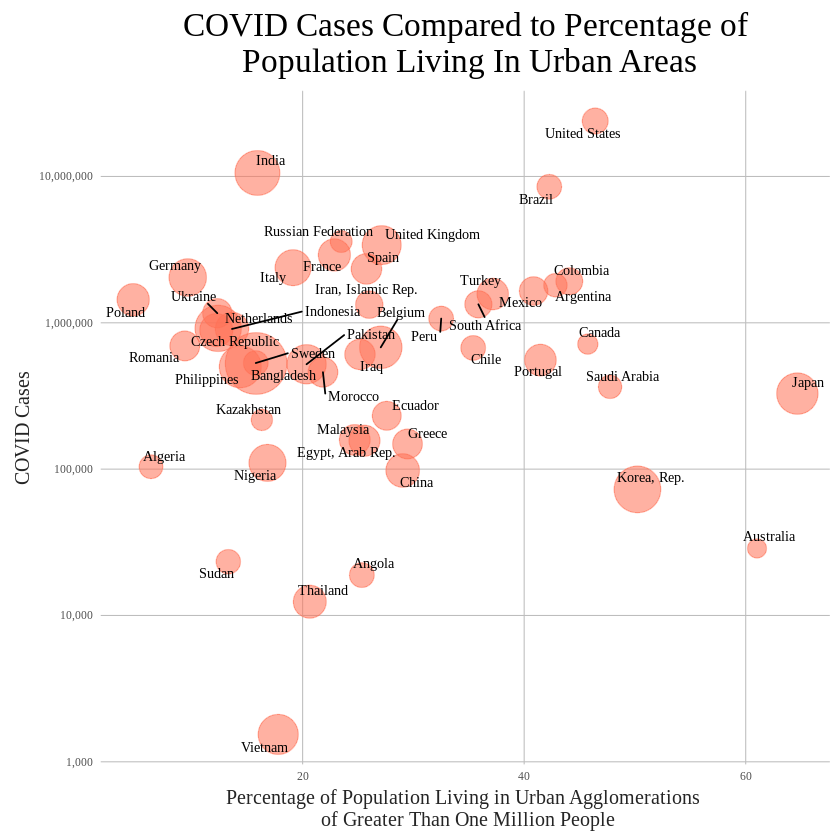

In [88]:
g2 <- ggplot(filter(total_case_death, GDP>100000 & population>10000000), aes(x=percent.agglom, y=cases)) +  #base plot
     scale_size(range = c(5,17)) + #setting limits for size
     geom_point(aes(size=population.density), color='coral1', alpha=.55) +
     geom_text_repel(aes(label=Country), size=3, family="Times New Roman") +
     labs(y='COVID Cases', x='Percentage of Population Living in Urban Agglomerations \n of Greater Than One Million People') +
     ggtitle("COVID Cases Compared to Percentage of\n Population Living In Urban Areas") +
        scale_y_log10(labels=comma) + my_theme() +  theme(legend.position="none") 
# png(filename="agglom.png")
g2
# dev.off()



In [89]:
# Looking at the above plots, I wanted to ensure that I included the countries that were most similar to the US
# in these plots. 
cont_interest = c('Brazil', 'Germany', 'France', 'India', 'United States', 'Russian Federation', 'United Kingdom',
                  'Italy', 'Spain', 'Mexico', 'Canada', 'Japan')
# Filtered out to only get higher death rates as well as the countries we wanted to see above. 

# Yemen was a large outlier of and so I took it out to make the plot nicer. 
filt <- total_case_death %>% filter(death.rate>4.5 | Country %in% cont_interest) %>% filter(Country!="Yemen, Rep.")


# Again filtering out to get the countries of interest as well as the ones we are interested in looking at. 
filt3 <- total_case_death %>% filter(case_per_10k>650 | Country %in% cont_interest)

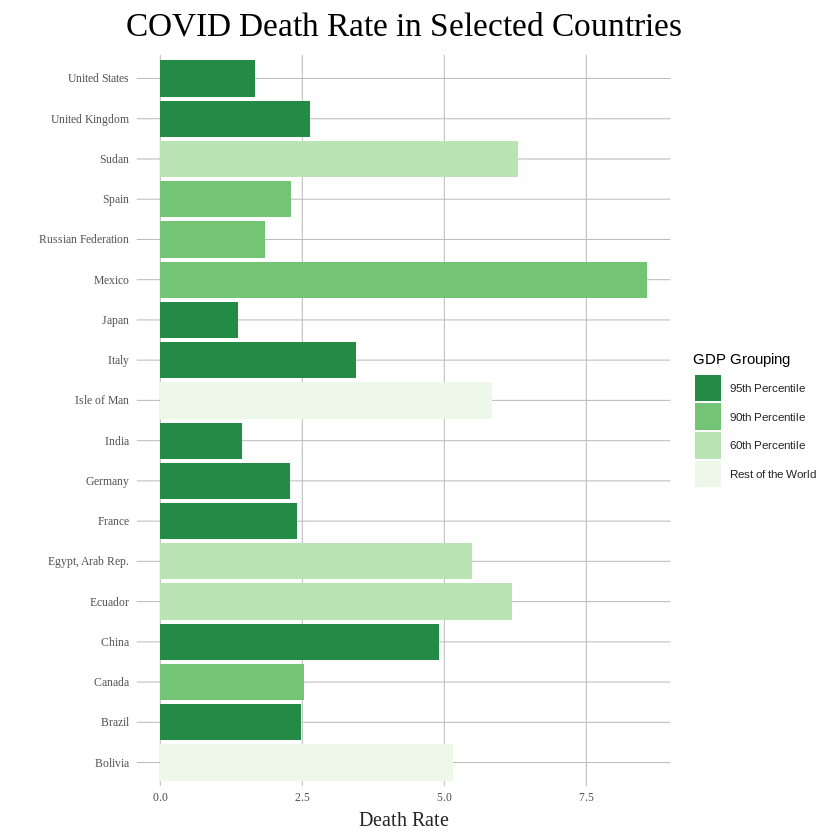

In [90]:

# png(filename="death_rate.png")

ggplot(data=filt, aes(x=Country, y=death.rate)) + geom_bar(stat='identity', aes(fill=gdp_group)) + 
    scale_fill_brewer(palette = 'Greens', direction=-1, name='GDP Grouping') + 
    labs(title='COVID Death Rate in Selected Countries', y='Death Rate',x='') +
    my_theme() + coord_flip()

# dev.off()

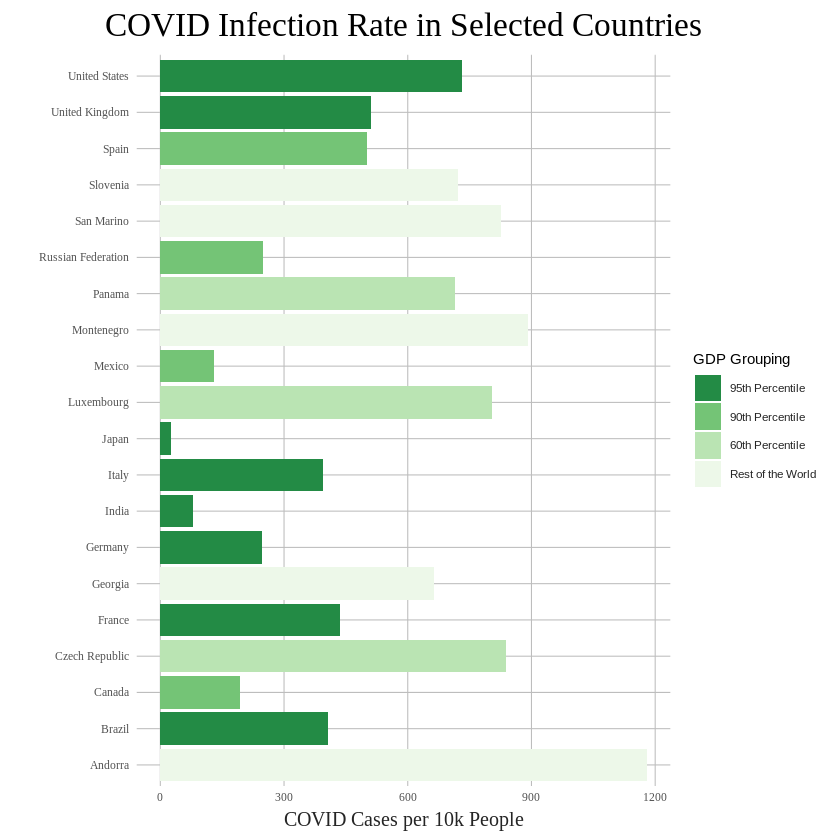

In [91]:
# png(filename="infection_rate.png")

ggplot(data=filt3, aes(x=Country, y=case_per_10k)) + geom_bar(stat='identity', aes(fill=gdp_group)) + 
    scale_fill_brewer(palette = 'Greens', direction=-1,  name='GDP Grouping') + 
    labs(title='COVID Infection Rate in Selected Countries', y='COVID Cases per 10k People',x='') +
    my_theme() + coord_flip()

# dev.off()

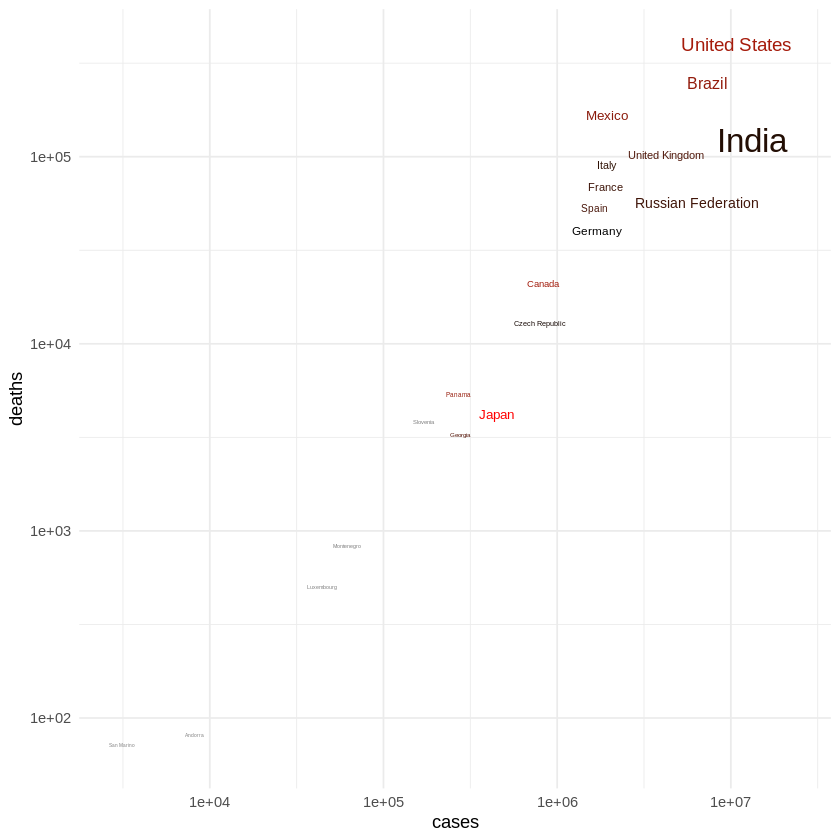

In [106]:
# Not using. 


# g3 <- ggplot(filt3, aes(x=cases, y=deaths)) +  #base plot
#  scale_size(range = c(1,7)) + #setting limits for size
#  scale_color_continuous(low="black", high="red") #scaling the color based GDP
# g3 + geom_text_repel(aes(label=Country, size=population, color=percent.agglom)) + scale_y_log10() + scale_x_log10() +
#     theme_minimal() +  theme(legend.position="none") 

---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following and check your visualizations and story accordingly:**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are you showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

 - Do NOT use sequential palettes for data attributes that have no ordering.
 - Do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered or grouped:  

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that character values (text) are **readable on the y axis** left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those data columns and/or subsets that tell an obvious story:

 - **No crowded** scatter plots with useless linear regression lines that don't tell anything.  
 - You do **NOT** have to plot **ALL** your data (most of the time, you should not). 
 - Look at alternative plots to tell your story effectively. 
 - Your plots should be perceived easily and intuitively. 
  
  

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can **group/cluster data into meaningful chunks** and display those as bubble charts, networks, geographical regions, etc. 

- Do **NOT** dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be **perceived immediately**. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use **meaningful** titles with a message/statement, no dry titles. 

- Use nice and concise axis labels (make sure they are large enough).

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**! Your audience will have more confidence in your work. 

- **Almost NEVER use the default color palette, default theme, or default fonts.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 

- If you must have a line plot or bar plot with a lot of empty space, try to put text annotations with relevant information in them. 